In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from imblearn.over_sampling import ADASYN

In [88]:
df = pd.read_csv('D:\\KULIAH\\Semester 5\\Pembelajaran Mesin\\Makalah\\U-BM 8-3_170818_11-Full.csv')
# Menampilkan beberapa baris pertama dataset
df.head()

,Retention Time,Intensity,m/z,Real_m/z,NamaSenyawa,RumusSenyawa,Status
0,5.022,281952,60.057205,60.03236,Urea,CH4N2O,0
1,5.022,198032,60.246963,60.03236,Urea,CH4N2O,0
2,5.022,43064,66.888519,67.04220,Pyrrol,C4H5N,0
3,5.022,63172,67.268036,67.04220,Pyrrol,C4H5N,0
4,5.022,57852,68.280075,68.03745,Imidazole,C3H4N2,0


In [89]:
#cleanning
#missing data
nan_data = df[df.isna().any(axis=1)]
nan_data


,Retention Time,Intensity,m/z,Real_m/z,NamaSenyawa,RumusSenyawa,Status
693,5.022,50628,434.008057,434.0679,PRZ_M435,NaN,0
5223,25.114,4124,433.881531,434.0679,PRZ_M435,NaN,0
11232,50.229,7433,433.818298,434.0679,PRZ_M435,NaN,0
13664,60.275,22849,433.818298,434.0679,PRZ_M435,NaN,0
14949,65.298,69580,433.818298,434.0679,PRZ_M435,NaN,0
...,...,...,...,...,...,...,...
644915,2305.560,26987,433.818298,434.0679,PRZ_M435,NaN,0
646121,2310.580,5525,433.944763,434.0679,PRZ_M435,NaN,0
650018,2325.650,31567,433.881531,434.0679,PRZ_M435,NaN,0
651260,2330.680,2732,433.944763,434.0679,PRZ_M435,NaN,0


In [90]:
df = df.dropna()
len(df)

662916

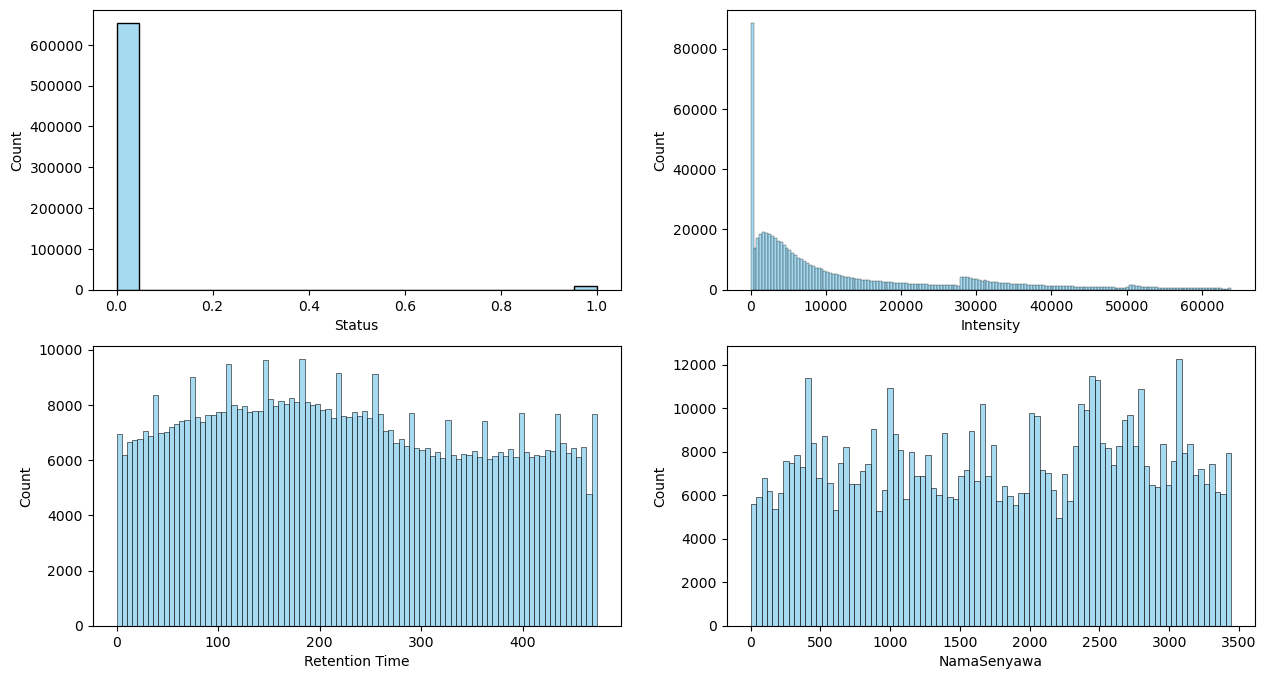

In [93]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=df,x='Status', ax=axes[0,0], color='skyblue')
sns.histplot(data=df,x='Intensity', ax=axes[0,1], color='skyblue')
sns.histplot(data=df,x='Retention Time', ax=axes[1,0], color='skyblue')
sns.histplot(data=df,x='NamaSenyawa', ax=axes[1,1], color='skyblue')
plt.show()

In [94]:
from sklearn.preprocessing import LabelEncoder

# Membuat instance dari LabelEncoder
encoder = LabelEncoder()

# Transformasi kolom-kolom tertentu
df['NamaSenyawa'] = encoder.fit_transform(df['NamaSenyawa'].values)
df['Status'] = encoder.fit_transform(df['Status'].values)
df['Retention Time'] = encoder.fit_transform(df['Retention Time'].values)
df['Intensity'] = encoder.fit_transform(df['Intensity'].values)
df['RumusSenyawa'] = encoder.fit_transform(df['RumusSenyawa'].values)

In [95]:
x = df.drop(['Status'],axis=1)
y = df['Status']

In [96]:
print(x.shape)
print(y.shape)

(662916, 6)
(662916,)


In [97]:
# Menggunakan ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
x_sampling, y_sampling = adasyn.fit_resample(x, y)

In [98]:
print(x_sampling.shape)
print(y_sampling.shape)

(1307266, 6)
(1307266,)


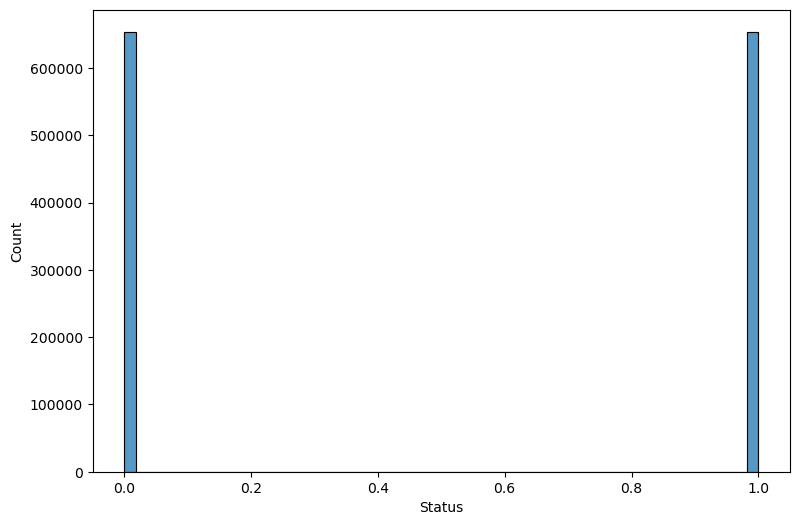

In [99]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
# Split the balanced dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_sampling, y_sampling, test_size=0.2, random_state=43)

In [102]:

# Create a KNN classifier as the base estimator
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Create an ensemble of KNN classifiers using bagging
ensemble_classifier = BaggingClassifier(base_estimator=knn_classifier, n_estimators=10, random_state=43)

# Train the ensemble on the training data
ensemble_classifier.fit(x_train, y_train)

# Make predictions on the test data
ensemble_predictions = ensemble_classifier.predict(x_test)

# Evaluate the performance of the ensemble
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {accuracy:.2f}')

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, ensemble_predictions))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, ensemble_predictions))

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [108]:
# Calculate overall precision, recall, F1 score, and support
overall_metrics = precision_recall_fscore_support(y_test, ensemble_predictions, average='weighted')
overall_precision, overall_recall, overall_f1, overall_support = overall_metrics
print(f'Overall Precision: {overall_precision}')
print(f'Overall Recall: {overall_recall}')
print(f'Overall F1 Score: {overall_f1}')
print(f'Overall Support: {overall_support}')
overall_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Overall Accuracy: {overall_accuracy}')

Overall Precision: 0.9802375452325456
Overall Recall: 0.9794457151162346
Overall F1 Score: 0.9794376136360131
Overall Support: None
Overall Accuracy: 0.9794457151162346


In [107]:
classification_rep = classification_report(y_test, ensemble_predictions, target_names=['0', '1'])
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    130842
           1       0.96      1.00      0.98    130612

    accuracy                           0.98    261454
   macro avg       0.98      0.98      0.98    261454
weighted avg       0.98      0.98      0.98    261454

